Linear

In [29]:
import numpy as np
import matplotlib.pyplot as plt
def create_mask_linear(xs, xt, lamb):
    n = len(xs)
    m = len(xt)
    M = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            if (i > j * n / m - lamb) & (i < j * n / m + lamb):
                M[i][j] = 1
    plt.imshow(M, cmap="viridis")
    plt.colorbar()
    plt.show()
    return M

Nonlinear

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math
def create_neighbor_relationship(xs):
    xs = np.array(xs)
    if xs.ndim == 1:
        xt = np.insert(xs, 0, np.zeros_like(xs[0]))[:-1]
        f = xs - xt
        f = f.reshape(-1, 1)
    else:
        xt = np.vstack((np.zeros_like(xs[0]), xs))[:-1]
        f = xs - xt
    d = np.linalg.norm(f, axis=1)
    f1 = np.cumsum(d)
    sum_dist = f1[len(f1) - 1]
    return f1 / sum_dist
def create_mask_non_linear(xs, xt, ratio=0.1, sigma=1, type=1):
    f1 = create_neighbor_relationship(xs)
    f2 = create_neighbor_relationship(xt)
    n = len(f1)
    m = len(f2)
    mid_para = np.sqrt((1 / (n**2) + 1 / (m**2)))
    KL = np.abs(np.subtract.outer(f1, f2)) / mid_para
    KL = np.exp(-(np.power(KL, 2)) / 2 * np.power(sigma, 2)) / (
        sigma * np.sqrt(2 * np.pi)
    )
    flattened_list = KL.flatten()
    sorted_list = sorted(flattened_list)
    pivot = sorted_list[math.floor((1 - ratio) * len(sorted_list))]
    M = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            if KL[i][j] > pivot:
                M[i][j] = 1
    plt.imshow(M, cmap="viridis")
    plt.colorbar()
    plt.show()
    return M

# 1. Masking Map Linear

In [16]:
sequence_1 = np.random.rand(100)
sequence_2 = np.random.rand(130)

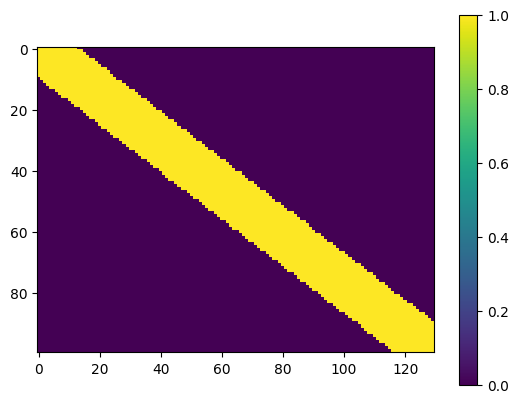

In [17]:
M1 = create_mask_linear(sequence_1, sequence_2, lamb=10)

# 2. Masking Map Non Linear

## 2.1. Create mock data

In [26]:
import numpy as np
import matplotlib.pyplot as plt
def create_mock_data(mean1=50, std_dev1=10, mean2=30, std_dev2=5, max_x=100, point_num=100, plot=False):
    x = np.linspace(0, max_x, point_num)  

    data1 = np.exp(-0.5 * ((x - mean1) / std_dev1) ** 2)
    data2 = np.exp(-0.5 * ((x - mean2) / std_dev2) ** 2)

    max_height = max(np.max(data1), np.max(data2))
    data2 *= max_height / np.max(data2)

    if plot:
        plt.figure(figsize=(8, 5))

        plt.plot(x, data1, color='red')
        plt.plot(x, data2, color='blue')

        plt.xlabel('Time point')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
        plt.show()
    return data2, data1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


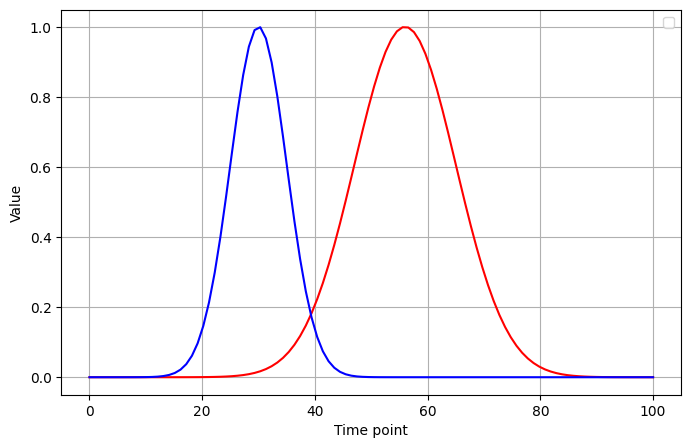

In [27]:
sequence_1, sequence_2 = create_mock_data(mean1=56, std_dev1=9 , mean2=30, std_dev2=5, plot=True)

## 2.2. Draw masking map

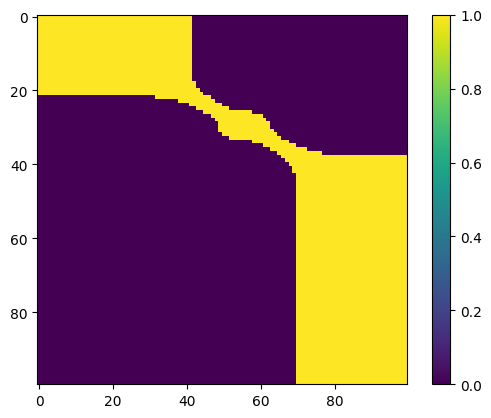

In [31]:
M2 = create_mask_non_linear(sequence_1, sequence_2, ratio=0.3)

# 3. Two masking maps

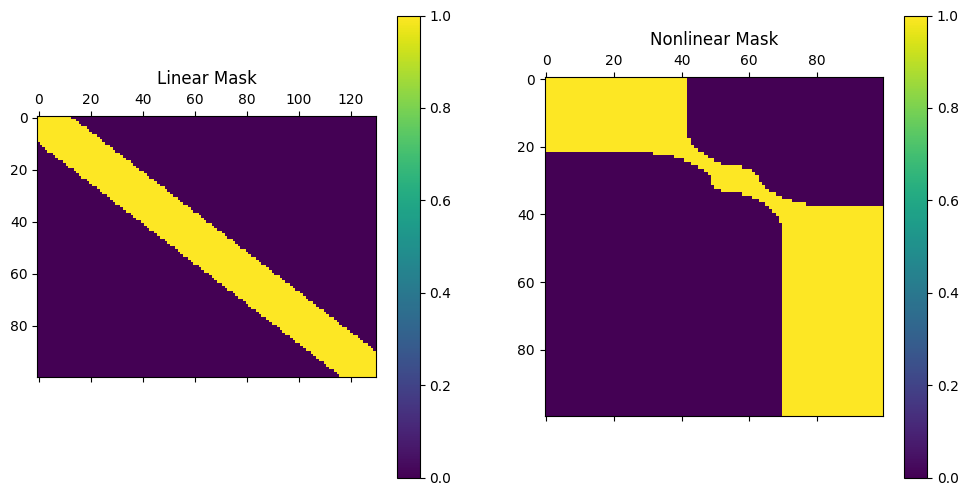

In [22]:
import matplotlib.pyplot as plt
import numpy as np
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cax1 = ax1.matshow(M1, cmap='viridis')
fig.colorbar(cax1, ax=ax1)
ax1.set_title('Linear Mask')

cax2 = ax2.matshow(M2, cmap='viridis')
fig.colorbar(cax2, ax=ax2)
ax2.set_title('Nonlinear Mask')

plt.show()


# 4. Two optimal transport plan map

In [44]:
from MaskingMap.MaskingMapLinear import masking_map_linear
from MaskingMap.MaskingMapNonLinear import masking_map_non_linear

In [51]:
import numpy as np
import matplotlib.pyplot as plt
def create_mock_data(mean1=50, std_dev1=10, mean2=30, std_dev2=5, max_x=100, point_num=100, plot=False):
    x = np.linspace(0, max_x, point_num)  

    data1 = np.exp(-0.5 * ((x - mean1) / std_dev1) ** 2)
    data2 = np.exp(-0.5 * ((x - mean2) / std_dev2) ** 2)

    max_height = max(np.max(data1), np.max(data2))
    data2 *= max_height / np.max(data2)

    if plot:
        plt.figure(figsize=(8, 5))

        plt.plot(x, data1, color='red')
        plt.plot(x, data2, color='blue')

        plt.xlabel('Time point')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
        plt.show()
    return data2, data1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


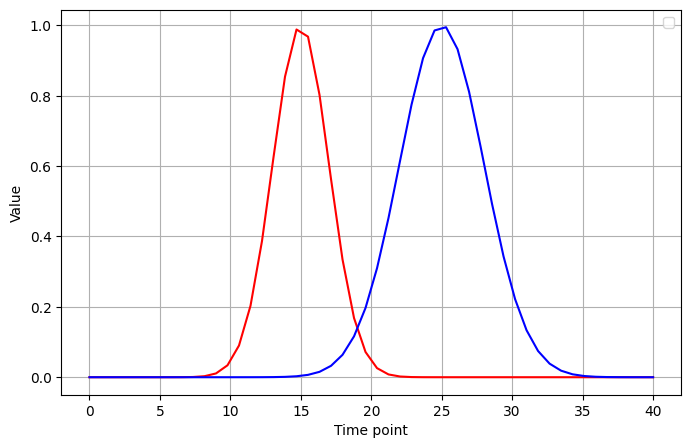

In [94]:
sequence_1, sequence_2 = create_mock_data(mean1=15, std_dev1=2 , mean2=25, std_dev2=3, max_x=40, point_num=50, plot=True)

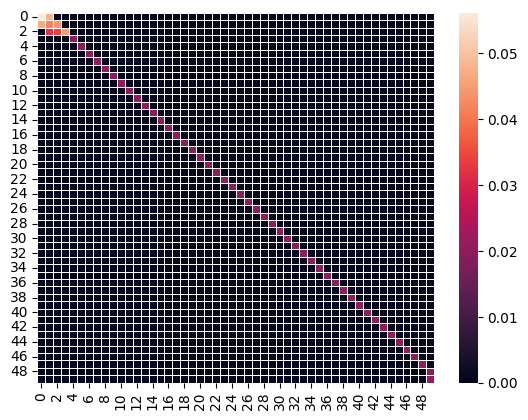

In [97]:
pi_linear, cost_linear = masking_map_linear(sequence_2, sequence_1, ratio=0.03, plot=True)

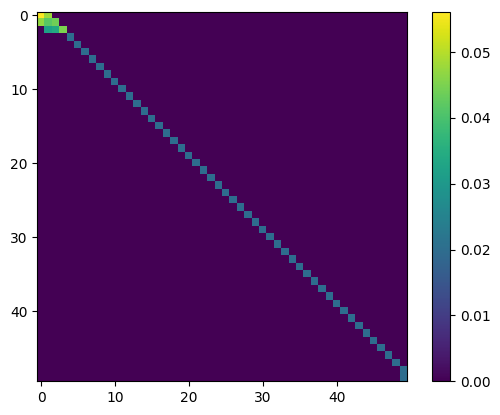

In [98]:
import matplotlib.pyplot as plt
plt.imshow(pi_linear, cmap='viridis')
plt.colorbar()
plt.show()

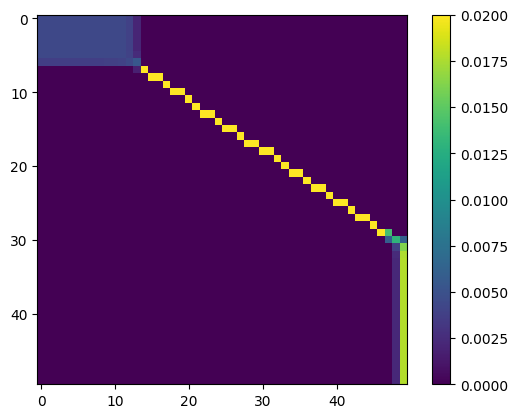

In [100]:
pi_nonlinear, cost_nonlinear = masking_map_non_linear(sequence_2, sequence_1, ratio=0.3, plot=True)

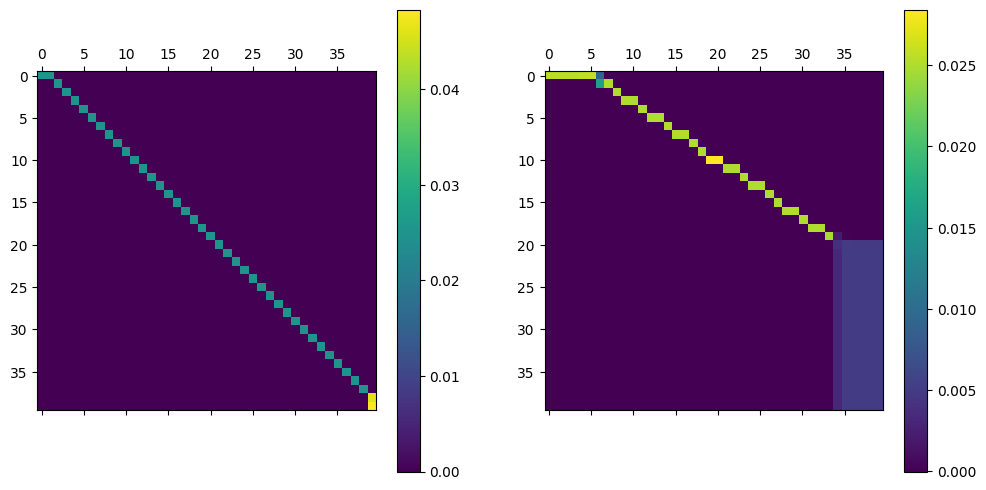

In [63]:
import matplotlib.pyplot as plt
import numpy as np
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cax1 = ax1.matshow(pi_linear, cmap='viridis')
fig.colorbar(cax1, ax=ax1)

cax2 = ax2.matshow(pi_nonlinear, cmap='viridis')
fig.colorbar(cax2, ax=ax2)

plt.show()

In [64]:
from GetData.GetData import getData
X_train, y_train, X_test, y_test = getData("ArabicCut", "../Data/")

In [79]:
y_train[90], y_test[100]

(2, 9)

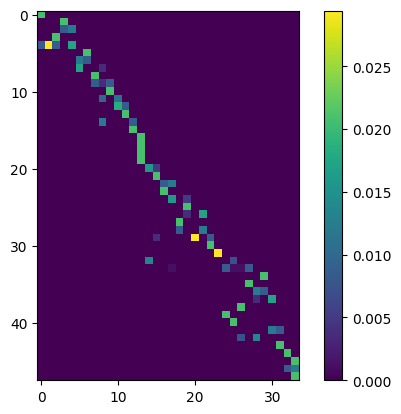

In [81]:
pi_nonlinear, cost_nonlinear = masking_map_non_linear(X_train[90], X_test[100], ratio=0.2, plot=True)